In [59]:
import numpy as np

In [60]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X ,y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_predicted = np.dot(X , self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        y_approximated = np.dot(X , self.weights) + self.bias
        return y_approximated

## Testing

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [62]:
x , y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [63]:
regressor = LinearRegression(learning_rate=0.01, n_iter=1000)
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)

In [64]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

MSE = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", MSE)

Mean Squared Error: 305.7719958301902


In [65]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (numerator / denominator)

r2 = r2_score(y_test, predictions)
print("R2 Score:", r2 )

R2 Score: 0.9247520464311005


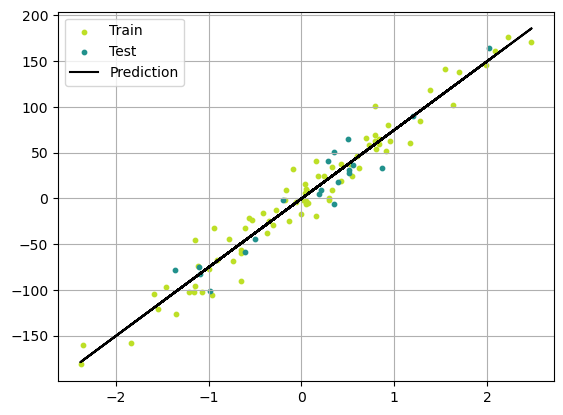

In [66]:
y_pred_line = regressor.predict(x)
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.plot(x, y_pred_line, color="black")
plt.grid(True)
plt.legend(["Train", "Test", "Prediction"])
plt.show()